# Public vs. Housing Banishment

This notebook will focus on separating and creating two distinct map layouts for:
- public banishment - places where the affected people can be
- housing banishment - places where the affected people cannot livewith 500ft vs. 250ft buffer

In [1]:
# import necessary pacakges
import geopandas as gpd
import mapclassify
import pandas as pd
import pickle
import os
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.ops import unary_union
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set path
directory_path = os.getcwd()
parent = os.path.dirname(directory_path)

In [3]:
# import pickled gdf
chicago_boundaries = pd.read_pickle(os.path.join(parent,'data/pickle/chicago_boundaries'))
bike_routes = pd.read_pickle(os.path.join(parent,'data/pickle/bike_routes'))
daycare_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/daycare_buffer'))
forestry = pd.read_pickle(os.path.join(parent,'data/pickle/forestry'))
parks_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/parks_buffer'))
schools_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/schools_buffer'))
opens_spaces = pd.read_pickle(os.path.join(parent,'data/pickle/open_spaces'))
loc_aff_index = pd.read_pickle(os.path.join(parent,'data/pickle/location_aff_index'))

## Housing Banishment

In [4]:
housing_banishment = [daycare_buffer, parks_buffer, schools_buffer]

In [5]:
housing_banishment

[          pin10  longitude   latitude municipali municipa_2  \
 935  2607162024 -87.554068  41.710186    Chicago      14000   
 837  2131216002 -87.556121  41.748045    Chicago      14000   
 933  2534101012 -87.616793  41.651987    Chicago      14000   
 934  2535100020 -87.599539  41.656232    Chicago      14000   
 932  2534100009 -87.614706  41.657532    Chicago      14000   
 ..          ...        ...        ...        ...        ...   
 407  1330307034 -87.795787  41.929667    Chicago      14000   
 406  1330305014 -87.798740  41.929667    Chicago      14000   
 404  1329228027 -87.770272  41.931993    Chicago      14000   
 401  1329114020 -87.784190  41.932991    Chicago      14000   
 403  1329216033 -87.775701  41.933497    Chicago      14000   
 
             politicalt  commission  congressio  staterepre  statesenat  ...  \
 935  Town of Hyde Park         4.0         2.0        25.0        13.0  ...   
 837  Town of Hyde Park         4.0         2.0        26.0        13.

### 500 ft buffer exercise

In [6]:
# set geometry to 500ft buffer



In [7]:
# solution
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

In [21]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(30,30),linewidth=4,label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

### Exercise

In [9]:
# plot each geometry (daycare_buffer, parks_buffer, schools_buffer)
# choose colors and set it on basemap

In [22]:
# solution
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)

ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

<Figure size 432x288 with 0 Axes>

In [23]:
#legend
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

In [24]:
# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (500ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})
# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_500ft.png'), transparent=True)
plt.show()

<Figure size 432x288 with 0 Axes>

### 250 ft buffer exercise

In [25]:
# set geometry to 250ft buffer



In [26]:
# solution
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

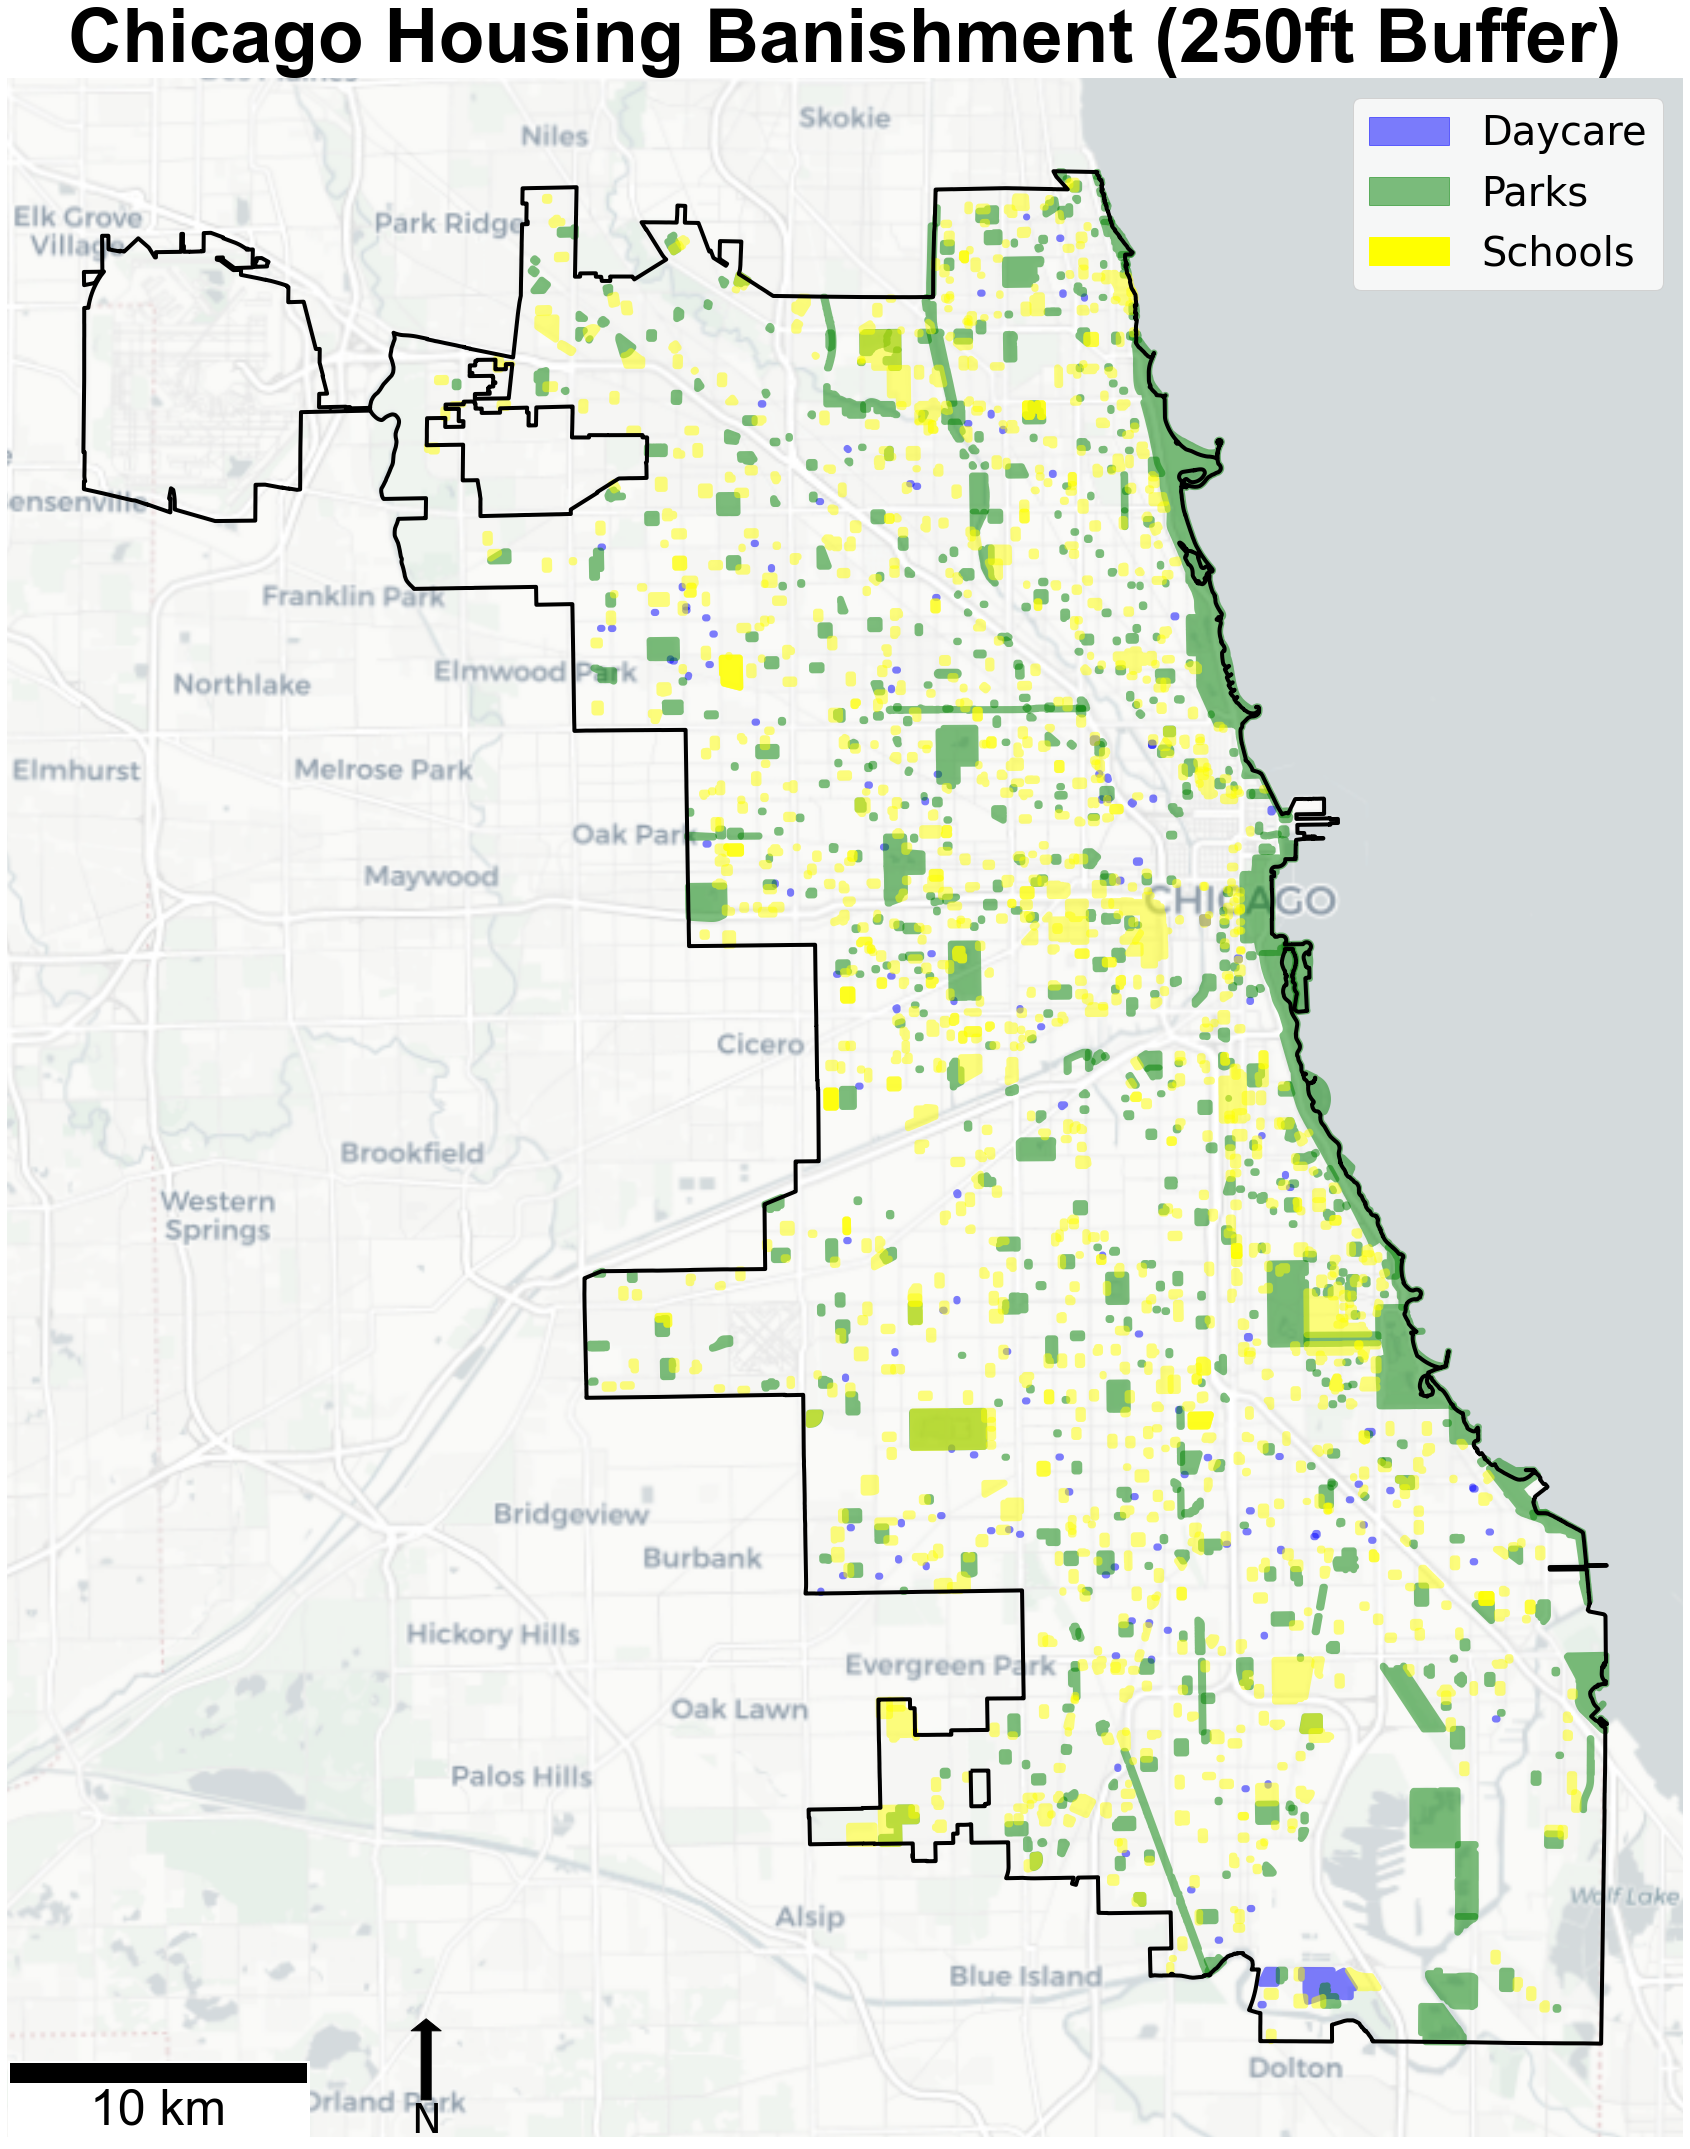

In [27]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_250ft.png'), transparent=True)
plt.show()

## Public Presence Banishment

- Any school
- Any public park building
- Any playground or recreation area
- Any public park
- Within 500ft of a public way or park whilst someone under the age of 18 is present
- Any daycare center
- Any county fair (when persons under the age of 18 are present)

To satisfy the above mandate, we will work with:
- Schools
- Daycre
- Parks
- Bike Paths (public way)
- Forest Preserves (public way)
- Open spaces - Boulevards zip? 


### Exercise

In [28]:
# make list of public banishment places



In [29]:
# solution
public_banishment = [schools_buffer, daycare_buffer, parks_buffer,bike_routes, 
                     forestry,opens_spaces]

In [30]:
# set geometry to standard non-buffered  geom
for gdf in public_banishment:
    gdf.set_geometry(col='geometry', inplace=True)

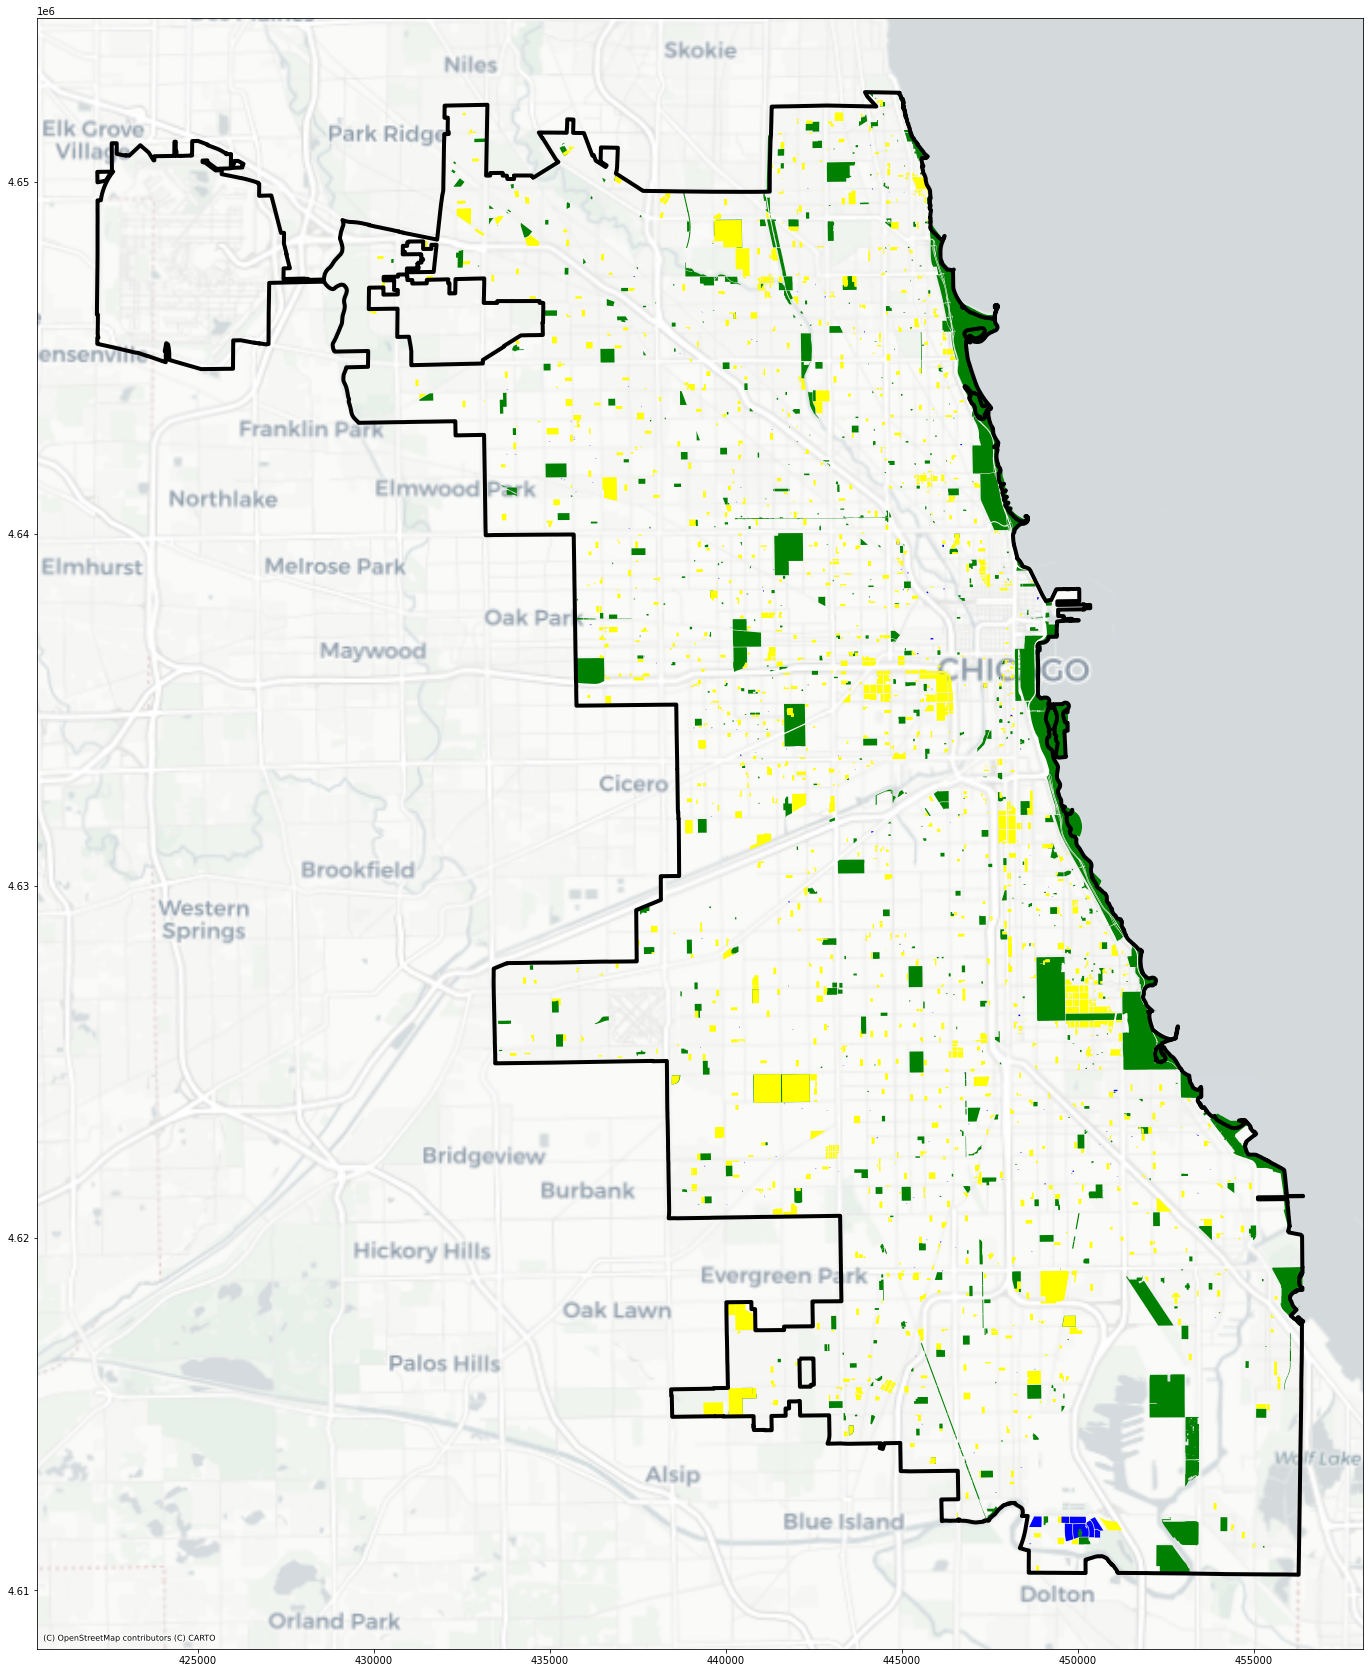

In [42]:
# public presence banishment map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

parks_buffer.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

schools_buffer.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

In [32]:
# Using same method as plotting geometry as daycare, parks, and schools
# plot the bike_routes, forestry, and open_spaces

In [43]:
# solution

bike_routes.plot(color='red', ax=basemap)
bike_routes_leg = mpatches.Patch(color='red', label='Bike Routes')

forestry.plot(color='darkgreen', ax=basemap)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forest Preserves')

opens_spaces.plot(color='orange', ax=basemap)
opens_spaces_leg = mpatches.Patch(color='orange', label='Boulevards')

<Figure size 7200x3600 with 0 Axes>

In [44]:
# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':35}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg,
                                          bike_routes_leg,
                                          forestry_leg, opens_spaces_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Public Banishment', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_public_banishment.png'), transparent=True)
plt.show()

<Figure size 7200x3600 with 0 Axes>